<a href="https://colab.research.google.com/github/Faisal-Al-Mamun/Predicting-Google-Stock-Prices-Trend-Using-LSTM-RNN/blob/main/Predicting_Google_Stock_Prices_Trend_Using_LSTM_%7C_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

Dataset downloaded from Kaggle: https://www.kaggle.com/medharawat/google-stock-price

* Training dataset contains google stock price from January 2012 to December 2016

* Test dataset contains google stock price for January 2017

In [3]:
dataset_train= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:,1:2].values

In [5]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [6]:
dataset_train.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


In [7]:
dataset_train.shape

(1258, 6)

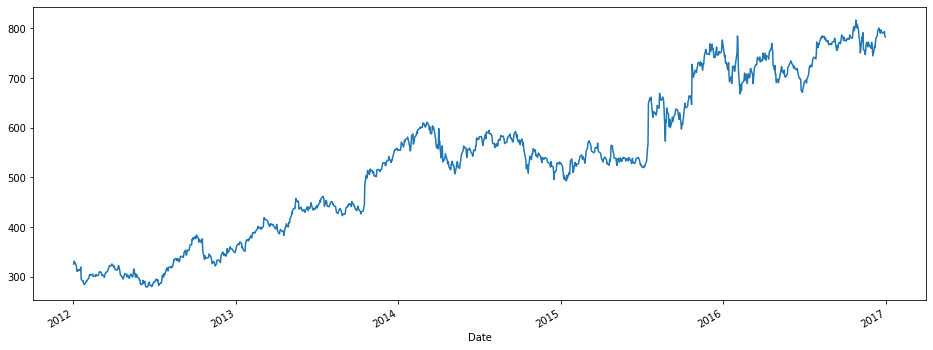

In [25]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Google_Stock_Price_Train.csv',index_col="Date",parse_dates=True)

dataset['Open'].plot(figsize=(16,6))

### Feature Scaling 

In [8]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

## Creating a data structure with 60 timesteps and 1 output

Timesteps = 60

60 time steps means that at each time 't' the RNN is going to look at the 60 stock prices.

Before time 't' that is the stock price is between 60 days before time 't' .

And based on the trends it is capturing during the 60 time steps will try to predict the next output. 

So 60 time steps are the past information from which our RNN is going to try to learn and understand some correlations or some trends.





In [9]:
X_train = []
y_train = []

for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [10]:
#Reshaping

X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1], 1))

### Building the RNN

In [11]:
from keras.models import Sequential # Sequential Model
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout #to avoid overfitting

In [12]:
# since predicting a continuous value, dealing with continuous values
regressor = Sequential() 
    
#adding first LSTM and dropout to avoid overfitting
# since we are going to add another LSTM layer
regressor.add(LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1], 1))) 
regressor.add(Dropout(0.2))
    
#adding second LSTM and dropout to avoid overfitting
regressor.add(LSTM(units = 50, return_sequences=True)) 
regressor.add(Dropout(0.2))
     
#adding third LSTM and dropout to avoid overfitting
regressor.add(LSTM(units = 50, return_sequences=True)) 
regressor.add(Dropout(0.2))
     
#adding fourth LSTM and dropout to avoid overfitting
regressor.add(LSTM(units = 50)) 
regressor.add(Dropout(0.2))
    
#adding the output layer
regressor.add(Dense(units=1))

In [13]:
#compiling the RNN

regressor.compile(optimizer='adam', loss = 'mean_squared_error')   

In [14]:
#Fitting RNN
#100 for much higher accuracy

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 12s 122ms/step - loss: 0.0415
Epoch 2/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0057
Epoch 3/100
38/38 [==============================] - 6s 148ms/step - loss: 0.0054
Epoch 4/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0048
Epoch 5/100
38/38 [==============================] - 5s 143ms/step - loss: 0.0051
Epoch 6/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0050
Epoch 7/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0041
Epoch 8/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0052
Epoch 9/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0043
Epoch 10/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0041
Epoch 11/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0047
Epoch 12/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0046
Epoch 13/100

### Making the predictions and viewing results

In [15]:
#Getting real stock price of 2017

dataset_test= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

In [16]:
#Getting the predicted stock price of 2017

dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']), axis=0)

inputs = dataset_total[ len(dataset_total) - len(dataset_test) -60:].values

inputs = inputs.reshape(-1,1)

inputs = sc.transform(inputs)

In [22]:
X_test = []

for i in range(60, 80):
    X_test.append(inputs[i-60:i,0])

X_test= np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualizing the Results

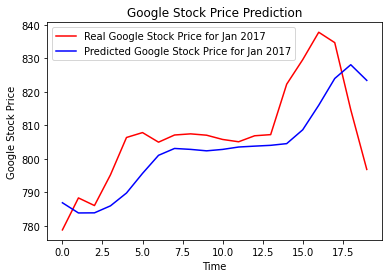

In [23]:
plt.plot(real_stock_price,color='red', label='Real Google Stock Price for Jan 2017')
plt.plot(predicted_stock_price,color='blue', label='Predicted Google Stock Price for Jan 2017')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()